In [1]:
# Cell 1
import os
import sys
sys.path.append(os.path.abspath('../src'))
import tensorflow as tf

from data import preprocess_data
from models_gb import train_gb_model
from evaluate import evaluate_model

RAW_PATH = "../data/raw/marine_water_quality.xlsm"
PROCESSED_PATH = "../data/processed/marine_water_quality_cleaned.csv"
MODEL_PATH = "/Users/anshbharti/Documents/SEM-6TH/water_quality_prediction/results/reports/model_gb.pkl"
RESULTS_DIR = "../reports/results_gb.txt"

with tf.device('/device:GPU:0'):
     #  Cell 2 - Preprocess
    preprocess_data(RAW_PATH, PROCESSED_PATH)

# Cell 3 - Train GB
    model, label_encoder, X_test, y_test = train_gb_model(PROCESSED_PATH, MODEL_PATH)

# Cell 4 - Evaluate
    evaluate_model(model, label_encoder, X_test, y_test, RESULTS_DIR)
  



2025-04-22 15:11:35.229530: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-22 15:11:35.229555: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-22 15:11:35.229561: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-22 15:11:35.229576: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-22 15:11:35.229589: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


                      precision    recall  f1-score   support

           drinkable       0.99      0.98      0.98      1074
good for marine life       0.97      0.98      0.97       825
      non consumable       0.97      0.94      0.95        93

            accuracy                           0.98      1992
           macro avg       0.97      0.96      0.97      1992
        weighted avg       0.98      0.98      0.98      1992



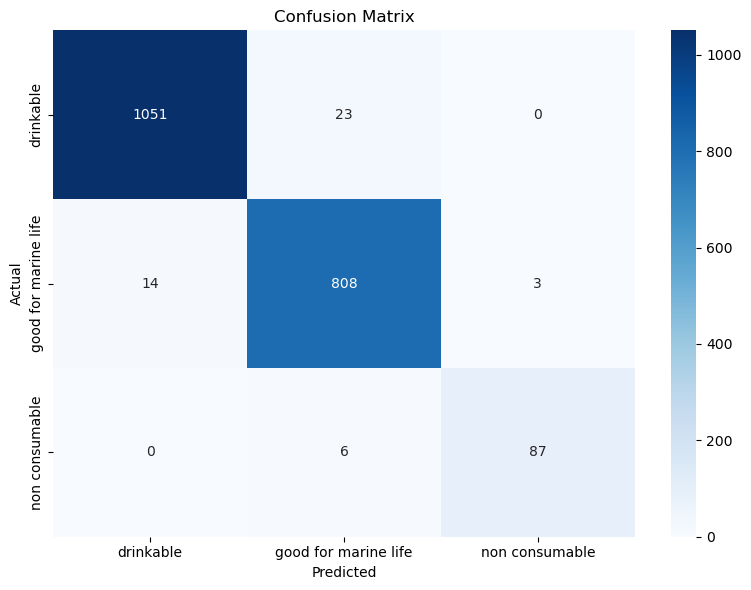

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)

# Convert encoded labels back to original
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
print("Done")